# Project AirBnb San Francisco - Marta Hinojosa Jiménez

El objetivo de este notebook es analizar el servicio de Airbnb en San Francisco (California). Por un lado se analizan los tipos de propiedad con los que cuenta el servicio y sus características (barrio, tipo de alquiler, cantidad de propiedades,...). Por otra parte, se realiza un análisis de los precios para tener un informe actualizado de ellos. Este análisis servirá para que la información esté actualizada en tiempo real y puedan utilizarla en la empresa para tomar decisiones y plantear nuevos objetivos para mejorar el servicio y su rentabilidad.

El dataframe principal ('listings') contiene características de las propiedades que los anfitriones ofrecen a través de AirBnb en San Francisco (consta de 8361 filas y 75 columnas). Se va a trabajar con una selección de columnas en una copia de listings llamado 'listings_copy' tras entender el contenido completo del principal y seleccionar las columnas para el estudio.

## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go
import folium
import geopandas as gpd
import geoplot as gplt

## Creación paleta 'AirBnb'

In [2]:
# Creación de paleta de colores de marca Airbnb para utilizarla en los gráficos
airbnb_palette = ['ff5a5e','fac8b5','16385b','feca30','737373','00000']
'''
rojo principal -- ff5a5e
rosita         -- fac8b5
azul oscuro    -- 16385b
mostaza        -- feca30
negro          -- 00000
gris           -- 737373
'''

'\nrojo principal -- ff5a5e\nrosita         -- fac8b5\nazul oscuro    -- 16385b\nmostaza        -- feca30\nnegro          -- 00000\ngris           -- 737373\n'

## Lectura y contenido 'listings'

In [3]:
# Lectura
listings = pd.read_csv('data/1-listings.csv')

In [4]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 40)  # Ancho de celdas al mostrar

# Mostrar 5 primeras filas
listings.head()

id                              listing_url  \
0             1094764     https://www.airbnb.com/rooms/1094764   
1            38047206    https://www.airbnb.com/rooms/38047206   
2            43475468    https://www.airbnb.com/rooms/43475468   
3  648549709021440854  https://www.airbnb.com/rooms/6485497...   
4            47918229    https://www.airbnb.com/rooms/47918229   

        scrape_id last_scraped           source  \
0  20240307173410   2024-03-07      city scrape   
1  20240307173410   2024-03-07  previous scrape   
2  20240307173410   2024-03-07  previous scrape   
3  20240307173410   2024-03-07      city scrape   
4  20240307173410   2024-03-07      city scrape   

                                      name  \
0         San Francisco Presidio Paradise!   
1                            52 Vesta home   
2  Beautiful Mission District Home and ...   
3  LuxoStays | ! Quiet Rm #Private Bath...   
4  Blueground | Marina District, w/d, n...   

                               description  \
0                                      NaN   
1                                      NaN   
2  Beautiful entire first floor of home...   
3  This house is well-maintained, and h...   
4  Feel at home wherever you choose to ...   

                     neighborhood_overview  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3  The neighborhood is on a quiet stree...   
4  This furnished apartment is located ...   

                               picture_url    host_id  \
0  https://a0.muscache.com/pictures/164...     172460   
1  https://a0.muscache.com/pictures/672...   92965890   
2  https://a0.muscache.com/pictures/f19...   65136730   
3  https://a0.muscache.com/pictures/mis...  226555948   
4  https://a0.muscache.com/pictures/pro...  107434423   

                                  host_url   host_name  host_since  \
0  https://www.airbnb.com/users/show/17...       Leila  2010-07-19   
1  https://www.airbnb.com/users/show/92...           唱  2016-09-01   
2  https://www.airbnb.com/users/show/65...        Ryan  2016-03-30   
3  https://www.airbnb.com/users/show/22...   Gi'Angelo  2018-11-19   
4  https://www.airbnb.com/users/show/10...  Blueground  2016-12-16   

          host_location                               host_about  \
0           Raleigh, NC  We are from the San Francisco Bay Ar...   
1        Bridgeport, CT                                      NaN   
2  Badamsha, Kazakhstan                                      NaN   
3     San Francisco, CA  Our company is called Luxo Stays bas...   
4          New York, NY  We’re Blueground, a global proptech ...   

  host_response_time host_response_rate host_acceptance_rate  \
0       within a day               100%                  50%   
1                NaN                NaN                  NaN   
2                NaN                NaN                  NaN   
3     within an hour               100%                  98%   
4     within an hour                99%                  97%   

  host_is_superhost                       host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/pictures/...   
1                 f  https://a0.muscache.com/im/pictures/...   
2                 f  https://a0.muscache.com/im/pictures/...   
3                 f  https://a0.muscache.com/im/pictures/...   
4                 f  https://a0.muscache.com/im/pictures/...   

                          host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/...  Richmond District   
1  https://a0.muscache.com/im/pictures/...                NaN   
2  https://a0.muscache.com/im/pictures/...   Mission District   
3  https://a0.muscache.com/im/pictures/...         Burlingame   
4  https://a0.muscache.com/im/pictures/...          Cambridge   

   host_listings_count  host_total_listings_count  \
0                    2                          6   
1                    1                      

### Detalle contenido columnas:

- id = identificador único de la propiedad
- listing_url = enlace para visualizar la propiedad en la web de AirBnb
- scrape_id = identificador único que indica cuándo se recopilaron los datos (proceso de raspado - scraping) de los listados de Airbnb.
- last_scrape = fecha en la que se realizó el último raspado de datos.
- source = de dónde provienen los datos (city scrape=6774 y previous scrape=1587). "city scrape" se enfoca en datos recopilados específicamente para una ciudad en particular en un momento dado, mientras que "previous scrape" se refiere a datos recopilados en un momento anterior que pueden no estar limitados a una ciudad específica.
- name: Nombre o título de la propiedad.
- description: Descripción de la propiedad.
- neighborhood_overview: Descripción del vecindario.
- picture_url: URL de la primera imagen de la propiedad en la web.
- host_id: Identificador único del anfitrión.
- host_url: URL del perfil del anfitrión en Airbnb.
- host_name: Nombre del anfitrión.
- host_since: Fecha en la que el anfitrión se unió a Airbnb.
- host_location: Ubicación del anfitrión.
- host_about: Información sobre el anfitrión.
- host_response_time: Tiempo de respuesta del anfitrión.
- host_response_rate: Tasa de respuesta del anfitrión.
- host_acceptance_rate: Tasa de aceptación del anfitrión.
- host_is_superhost: Indicador de si el anfitrión es un "superhost" o no.
- host_thumbnail_url: URL de la imagen en miniatura del perfil del anfitrión.
- host_picture_url: URL de la imagen del perfil del anfitrión.
- host_neighbourhood: Vecindario del anfitrión.
- host_listings_count: Número total de propiedades en el momento del anfitrión.
- host_total_listings_count: Número total de propiedades del anfitrión.
- host_verifications: Métodos de verificación del anfitrión.
- host_has_profile_pic: Indicador de si el anfitrión tiene una foto de perfil (t = 8300, f = 61).
- host_identity_verified: Indicador de si la identidad del anfitrión ha sido verificada.
- neighbourhood: distrito de la propiedad (San Francisco = 5726, Tiburon = 3, Hayes Valley = 1, Noe Valley = 1).
- neighbourhood_cleansed: barrio de San Francisco donde se encuentra la propiedad.
- neighbourhood_group_cleansed: 
- latitude: Latitud geográfica de la propiedad.
- longitude: Longitud geográfica de la propiedad.
- property_type: Tipo de propiedad (Entire rental unit, room in hotel, entire home, private room in home,...).
- room_type: Tipo de habitación (Entire home/apt = 4923, Private room = 3304, Shared room = 72, Hotel room = 62).
- accommodates: Número de personas que pueden ser acomodadas.
- bathrooms: Número de baños (float, no tiene sentido).
- bathrooms_text: Descripción del número de baños (bath, private bath, shared bath,...)
- bedrooms: Número de habitaciones.
- beds: Número de camas.
- amenities: Comodidades proporcionadas en la propiedad (Private entrance, Elevator, Fire extinguisher, Clothing storage,...)
- price: Precio del alquiler por noche (formato: $150.00)
- minimum_nights: Número mínimo de noches para reservar.
- maximum_nights: Número máximo de noches para reservar.
- minimum_minimum_nights: Mínimo de noches mínimas. (Coincide)
- maximum_minimum_nights: Máximo de noches mínimas. (Coincide)
- minimum_maximum_nights: Mínimo de noches máximas. (Coincide)
- maximum_maximum_nights: Máximo de noches máximas. (Coincide)
- minimum_nights_avg_ntm: Mínimo de noches promedio. (Coincide)
- maximum_nights_avg_ntm: Máximo de noches promedio. (Coincide)
- calendar_updated: Fecha en que se actualizó el calendario. (Columna completa NaN).
- has_availability: Indicador de si la propiedad está disponible.
- availability_30: Número de días disponibles en los próximos 30 días.
- availability_60: Número de días disponibles en los próximos 60 días.
- availability_90: Número de días disponibles en los próximos 90 días.
- availability_365: Número de días disponibles en el año.
- calendar_last_scraped: Fecha en que se raspó por última vez el calendario (2024-03-07 = 7634, 2024-03-08 = 726, 2024-03-10 = 1).
- number_of_reviews: Número total de reseñas de la propiedad.
- number_of_reviews_ltm: Número total de reseñas en el último año.
- number_of_reviews_l30d: Número total de reseñas en los últimos 30 días.
- first_review: Fecha de la primera reseña.
- last_review: Fecha de la última reseña.
- review_scores_rating: Calificación general de reseñas dada por los usuarios a una propiedad después de su estancia (entre 0 y 5).
- review_scores_accuracy: Calificación de precisión de reseñas. (No relevante)
- review_scores_cleanliness: Calificación de limpieza de reseñas. (No relevante)
- review_scores_checkin: Calificación de registro de reseñas. (No relevante)
- review_scores_communication: Calificación de comunicación de reseñas. (No relevante)
- review_scores_location: Calificación de ubicación de reseñas. (No relevante)
- review_scores_value: Calificación de valor de reseñas. (No relevante)
- license: Licencia de la propiedad. ¿?
- instant_bookable: Indicador de si la propiedad se puede reservar instantáneamente. (f = 6192, t = 2169)
- calculated_host_listings_count: Número total de propiedades del anfitrión (repartidos entre las 3 siguientes)
- calculated_host_listings_count_entire_homes: Número total de listados de hogares enteros del anfitrión.
- calculated_host_listings_count_private_rooms: Número total de listados de habitaciones privadas del anfitrión.
- calculated_host_listings_count_shared_rooms: Número total de listados de habitaciones compartidas del anfitrión.
- reviews_per_month: Promedio de reseñas por mes.

In [5]:
# Filas, columnas de listings
listings.shape

(8361, 75)

### Creación 'listings_copy' para análisis (con las columnas que se utilizarán en el estudio).

In [6]:
listings_copy = listings.copy()
listings_copy = listings[['id', 'price', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bedrooms', 'bathrooms', 'accommodates', 'latitude', 'longitude', 'number_of_reviews' , 'number_of_reviews_ltm', 'review_scores_rating', 'availability_365', 'reviews_per_month', 'minimum_nights', 'maximum_nights']]

In [7]:
listings_copy.head()

id    price neighbourhood_cleansed         property_type  \
0             1094764  $150.00         Inner Richmond    Entire rental unit   
1            38047206      NaN                Bayview  Private room in home   
2            43475468      NaN                Mission           Entire home   
3  648549709021440854   $69.00              Excelsior  Private room in home   
4            47918229  $246.00                 Marina    Entire rental unit   

         room_type  bedrooms  bathrooms  accommodates   latitude   longitude  \
0  Entire home/apt       1.0        NaN             2  37.788140 -122.465470   
1     Private room       NaN        NaN             1  37.729800 -122.400960   
2  Entire home/apt       2.0        NaN             5  37.757210 -122.412450   
3     Private room       1.0        2.5             2  37.726761 -122.408522   
4  Entire home/apt       2.0        1.0             4  37.803660 -122.445180   

   number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
0                  1                      0                   5.0   
1                  0                      0                   NaN   
2                  0                      0                   NaN   
3                  6                      3                   5.0   
4                  0                      0                   NaN   

   availability_365  reviews_per_month  minimum_nights  maximum_nights  
0               365               0.03              30             180  
1                 0                NaN              90            1125  
2                 0                NaN              30            1125  
3               216               0.33              30            1125  
4               341                NaN              31            1125

In [8]:
# Resumen listings_copy
listings_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8361 entries, 0 to 8360
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8361 non-null   int64  
 1   price                   6774 non-null   object 
 2   neighbourhood_cleansed  8361 non-null   object 
 3   property_type           8361 non-null   object 
 4   room_type               8361 non-null   object 
 5   bedrooms                7849 non-null   float64
 6   bathrooms               6769 non-null   float64
 7   accommodates            8361 non-null   int64  
 8   latitude                8361 non-null   float64
 9   longitude               8361 non-null   float64
 10  number_of_reviews       8361 non-null   int64  
 11  number_of_reviews_ltm   8361 non-null   int64  
 12  review_scores_rating    6198 non-null   float64
 13  availability_365        8361 non-null   int64  
 14  reviews_per_month       6197 non-null   

### Limpieza y tratamiento de columnas 'listings'

In [9]:
# Revisar nombres columnas
listings_copy.columns

Index(['id', 'price', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bedrooms', 'bathrooms', 'accommodates', 'latitude', 'longitude',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'availability_365', 'reviews_per_month', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

In [10]:
# Consultar tipo de datos en cada columna
print(listings_copy.dtypes)

id                          int64
price                      object
neighbourhood_cleansed     object
property_type              object
room_type                  object
bedrooms                  float64
bathrooms                 float64
accommodates                int64
latitude                  float64
longitude                 float64
number_of_reviews           int64
number_of_reviews_ltm       int64
review_scores_rating      float64
availability_365            int64
reviews_per_month         float64
minimum_nights              int64
maximum_nights              int64
dtype: object


In [11]:
# Eliminar el símbolo "$" de la columna 'price' y convertir a tipo float
listings_copy['price'] = listings_copy['price'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\Marta\AppData\Local\Temp\ipykernel_9300\4011799355.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings_copy['price'] = listings_copy['price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Marta\AppData\Local\Temp\ipykernel_9300\4011799355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_copy['price'] = listings_copy['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [12]:
listings_copy.describe().T

count          mean           std        min  \
id                     8361.0  3.674627e+17  4.484912e+17  958.00000   
price                  6774.0  2.162322e+02  4.685795e+02   10.00000   
bedrooms               7849.0  1.433813e+00  1.024413e+00    0.00000   
bathrooms              6769.0  1.294948e+00  6.945506e-01    0.00000   
accommodates           8361.0  3.144959e+00  1.943469e+00    1.00000   
latitude               8361.0  3.777020e+01  2.288111e-02   37.70848   
longitude              8361.0 -1.224294e+02  2.659016e-02 -122.51246   
number_of_reviews      8361.0  4.549994e+01  9.904069e+01    0.00000   
number_of_reviews_ltm  8361.0  8.627796e+00  1.851349e+01    0.00000   
review_scores_rating   6198.0  4.756173e+00  4.808493e-01    1.00000   
availability_365       8361.0  1.771723e+02  1.339997e+02    0.00000   
reviews_per_month      6197.0  1.233463e+00  1.772611e+00    0.01000   
minimum_nights         8361.0  1.985492e+01  4.781252e+01    1.00000   
maximum_nights         8361.0  6.326671e+02  1.546601e+04    1.00000   

                                25%           50%           75%           max  
id                     2.295335e+07  4.880564e+07  8.509991e+17  1.105980e+18  
price                  1.000000e+02  1.500000e+02  2.240000e+02  2.500000e+04  
bedrooms               1.000000e+00  1.000000e+00  2.000000e+00  1.500000e+01  
bathrooms              1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+01  
accommodates           2.000000e+00  2.000000e+00  4.000000e+00  1.600000e+01  
latitude               3.775554e+01  3.777611e+01  3.778841e+01  3.780981e+01  
longitude             -1.224406e+02 -1.224216e+02 -1.224111e+02 -1.223585e+02  
number_of_reviews      0.000000e+00  6.000000e+00  4.000000e+01  1.166000e+03  
number_of_reviews_ltm  0.000000e+00  1.000000e+00  7.000000e+00  3.870000e+02  
review_scores_rating   4.740000e+00  4.910000e+00  5.000000e+00  5.000000e+00  
availability_365       4.400000e+01  1.770000e+02  3.010000e+02  3.650000e+02  
reviews_per_month      1.800000e-01  5.100000e-01  1.640000e+00  3.469000e+01  
minimum_nights         2.000000e+00  3.000000e+00  3.000000e+01  1.125000e+03  
maximum_nights         3.000000e+01  3.600000e+02  3.650000e+02  9.999990e+05

In [13]:
# Valores duplicados
listings_copy.duplicated().sum()

0

In [14]:
# Total NaN por columnas
total_nan = listings_copy.isnull().sum().sort_values(ascending=False)
print("Total valores nulos por columna:\n", total_nan, "\n")

# Porcentaje de nulos en cada columna
perc_nan = (((listings_copy.isnull().sum()) / len(listings_copy)) * 100).sort_values(ascending=False)
print("% valores nulos por columna:\n", perc_nan.to_string())

Total valores nulos por columna:
 reviews_per_month         2164
review_scores_rating      2163
bathrooms                 1592
price                     1587
bedrooms                   512
id                           0
number_of_reviews            0
minimum_nights               0
availability_365             0
number_of_reviews_ltm        0
latitude                     0
longitude                    0
accommodates                 0
room_type                    0
property_type                0
neighbourhood_cleansed       0
maximum_nights               0
dtype: int64 

% valores nulos por columna:
 reviews_per_month         25.882072
review_scores_rating      25.870111
bathrooms                 19.040785
price                     18.980983
bedrooms                   6.123669
id                         0.000000
number_of_reviews          0.000000
minimum_nights             0.000000
availability_365           0.000000
number_of_reviews_ltm      0.000000
latitude                   0.00000

#### Columna 'price'

In [15]:
# Crear el gráfico de caja con Plotly Express para visualizar la distribución de los precios y los outliers
listings_copy_sorted = listings_copy.sort_values(by='price')  

# Crear el gráfico de caja con los datos ordenados
fig = px.box(listings_copy_sorted, x='price')
fig.show()

In [16]:
# Vemos en el gráfico la cantidad de outliers. Realizar cálculo para tener el % exacto.

# Calcular % de outliers en la columna ['price'] 
Q1 = listings_copy['price'].quantile(0.25)
Q3 = listings_copy['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = listings_copy[(listings_copy['price'] < lower_bound) | (listings_copy['price'] > upper_bound)]

percentage_outliers = round(len(outliers) / len(listings_copy) * 100,1)

print("El porcentaje de outliers en la columna 'price' es:", percentage_outliers, "%")

El porcentaje de outliers en la columna 'price' es: 6.5 %


In [17]:
# Outliers price -> propiedades con precio noche mayor a $451  (hay un total de 463 propiedades outliers)
outliers_price = listings_copy[listings_copy['price'] > 451]
print(outliers_price.sort_values(by='price', ascending=False))

                       id    price neighbourhood_cleansed  \
2304   785698957007308545  25000.0         Inner Richmond   
7414   642886705473802703  14000.0         Bernal Heights   
6538              1059961  10000.0        South of Market   
270              36002747  10000.0  Downtown/Civic Center   
1721             48512663   6000.0         Bernal Heights   
...                   ...      ...                    ...   
6746             53660857    457.0         Bernal Heights   
97                6335352    456.0             Noe Valley   
2113  1065427688768753472    456.0  Downtown/Civic Center   
3432   722977901384095723    455.0                Mission   
60                1970257    455.0                Mission   

                   property_type        room_type  bedrooms  bathrooms  \
2304          Entire rental unit  Entire home/apt       2.0        1.0   
7414          Entire rental unit  Entire home/apt       1.0        1.0   
6538  Shared room in rental unit      Shared 

In [18]:
# Crear un mapa para visualizar la distribución de los outliers ("viviendas de alquiler de lujo")
map_outliers = folium.Map(location=[listings_copy['latitude'].mean(), listings_copy['longitude'].mean()], zoom_start=10)

# Iterar sobre los valores atípicos y agregar marcadores al mapa
for index, row in outliers_price.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Price: {row['price']}").add_to(map_outliers)

# Mostrar el mapa
map_outliers

# Podemos ver como las propiedades con precio/noche superior a $451 están repartidas por toda la ciudad.
# Proceder a eliminarlas, puesto que influyen considerablemente en la media y queremos el foco en la mayoría de los
# listings. Obtener después la media de las demás propiedades e imputar los valores nulos con esa nueva media.

In [19]:
# Eliminar los NaN y calcular NUEVA MEDIA sin ellos. Imputar NaN por esa media. 
listings_copy = listings_copy[~(listings_copy['price'] > 451)]                     # Filtrar los valores que no son mayores a 451
mean_price = listings_copy['price'].mean()                                         # Calcular la nueva media sin los outliers
listings_copy.loc[listings_copy['price'].isna(), 'price'] = mean_price             # Sustituir los valores NaN en la columna 'price' con la media calculada
listings_copy['price'].isnull().sum()                                              # Comprobar

0

In [20]:
listings_copy['price'].mean()    # Valor media 'price' sin outliers. Con outliers era $216,23

160.04658532720646

In [21]:
listings_copy.shape

(7898, 17)

In [22]:
# DISTRIBUCIÓN 'price' SIN OUTLIERS
listings_copy_sorted2 = listings_copy.sort_values(by='price')  
fig = px.box(listings_copy_sorted2, x='price', color_discrete_sequence=['#16385b'])                   
fig.show()

#### Columna 'bathrooms'

<Axes: xlabel='bathrooms', ylabel='Count'>

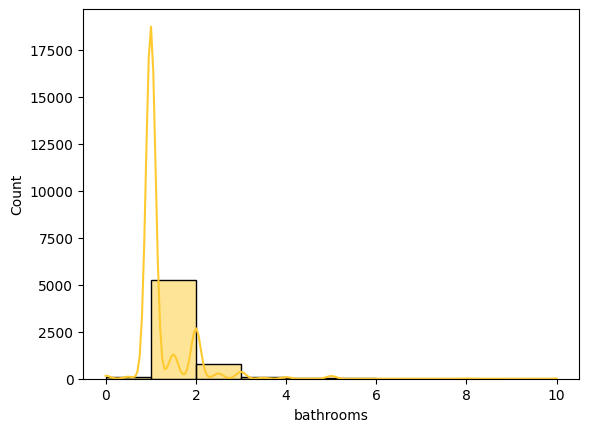

In [23]:
# DISTRIBUCIÓN DE LOS DATOS en la columna 'bathrooms'
sns.histplot(data=listings_copy, x='bathrooms', bins=10, kde=True, color='#feca30')

In [24]:
# Sustituir NaN por mediana (la trato como variable discreta)
median_bathrooms = listings_copy['bathrooms'].median()                                 # Calcular la mediana de la columna 'bathroom'
listings_copy.loc[listings_copy['bathrooms'].isna(), 'bathrooms'] = median_bathrooms   # Rellenar los valores NaN en la columna 'bathroom' con la mediana calculada
listings_copy['bathrooms'].isnull().sum()                                              # Comprobar

0

#### Columna 'bedrooms'

<Axes: xlabel='bedrooms', ylabel='Count'>

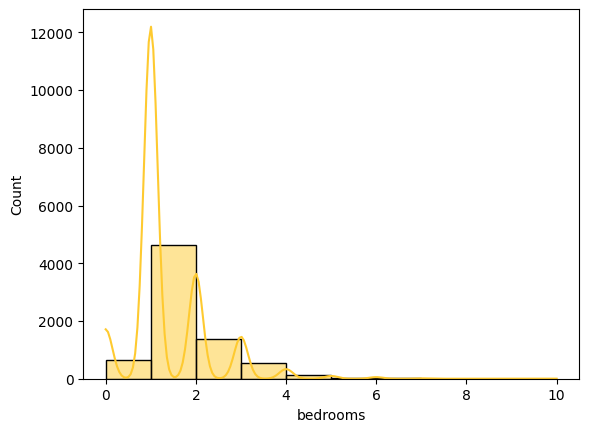

In [25]:
# DISTRIBUCIÓN DE LOS DATOS en la columna 'bedrooms'
sns.histplot(data=listings_copy, x='bedrooms', bins=10, kde=True, color='#feca30')

In [26]:
# Sustituir NaN por mediana (la trato como variable discreta)
median_bedrooms = listings_copy['bedrooms'].median()                                 # Calcular la mediana de la columna 'bathroom'
listings_copy.loc[listings_copy['bedrooms'].isna(), 'bedrooms'] = median_bedrooms    # Rellenar los valores NaN en la columna 'bathroom' con la mediana calculada
listings_copy['bedrooms'].isnull().sum()                                             # Comprobar

0

#### Columna 'review_scores_rating'

<Axes: xlabel='review_scores_rating', ylabel='Count'>

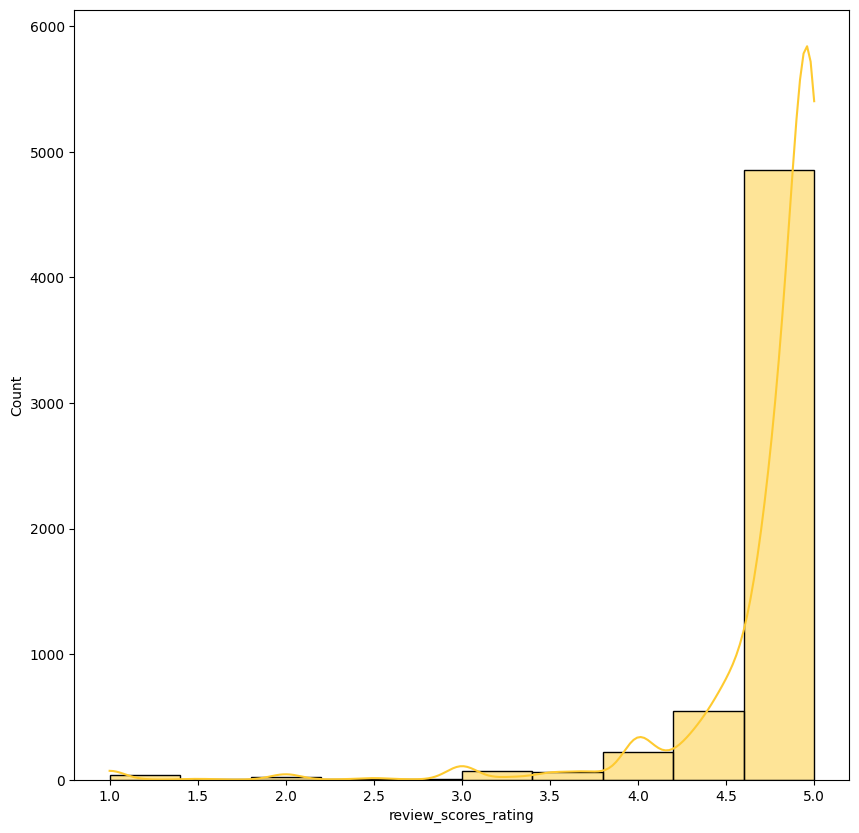

In [27]:
# DISTRIBUCIÓN DE LOS DATOS en la columna 'review_scores_rating'
plt.figure(figsize=(10, 10))
sns.histplot(data=listings_copy, x='review_scores_rating', bins=10, kde=True, color='#feca30')

In [28]:
fig = px.box(listings_copy, x='review_scores_rating', color_discrete_sequence=['#feca30'])    # Crear boxplot
fig.update_traces(line_color='#16385b')                                                       # Actualizar el color de la línea para diferenciar outliers
fig.show()

In [29]:
# Vemos en el gráfico la cantidad de outliers. Realizar cálculo para tener el % exacto.

# Calcular % de outliers en la columna ['reviews_per_month'] 
Q1 = listings_copy['review_scores_rating'].quantile(0.25)
Q3 = listings_copy['review_scores_rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = listings_copy[(listings_copy['review_scores_rating'] < lower_bound) | (listings_copy['reviews_per_month'] > upper_bound)]

percentage_outliers = round(len(outliers) / len(listings_copy) * 100,1)

print("El porcentaje de outliers en la columna 'review_scores_rating' es:", percentage_outliers, "%")

El porcentaje de outliers en la columna 'review_scores_rating' es: 8.5 %


In [30]:
# Sustituir valores NaN de la columna por la media. En este caso decido no quitar los outliers ya que es un rango cerrado (de 1 a 5).
mean_rating = listings_copy['review_scores_rating'].mean()                 # Calcular la media de la columna 'review_scores_rating'
listings_copy['review_scores_rating'].fillna(mean_rating, inplace=True)    # Sustituir los valores NaN por la media

In [31]:
# VISUALIZAR DE NUEVO con NaN imputados
fig = px.box(listings_copy, x='review_scores_rating', color_discrete_sequence=['#feca30'])    # Crear boxplot
fig.update_traces(line_color='#16385b')                                                       # Actualizar el color de la línea para diferenciar outliers
fig.show()

#### Columna 'reviews_per_month'

In [32]:
listings_copy['reviews_per_month'].isnull().sum()

2069

<Axes: xlabel='reviews_per_month', ylabel='Count'>

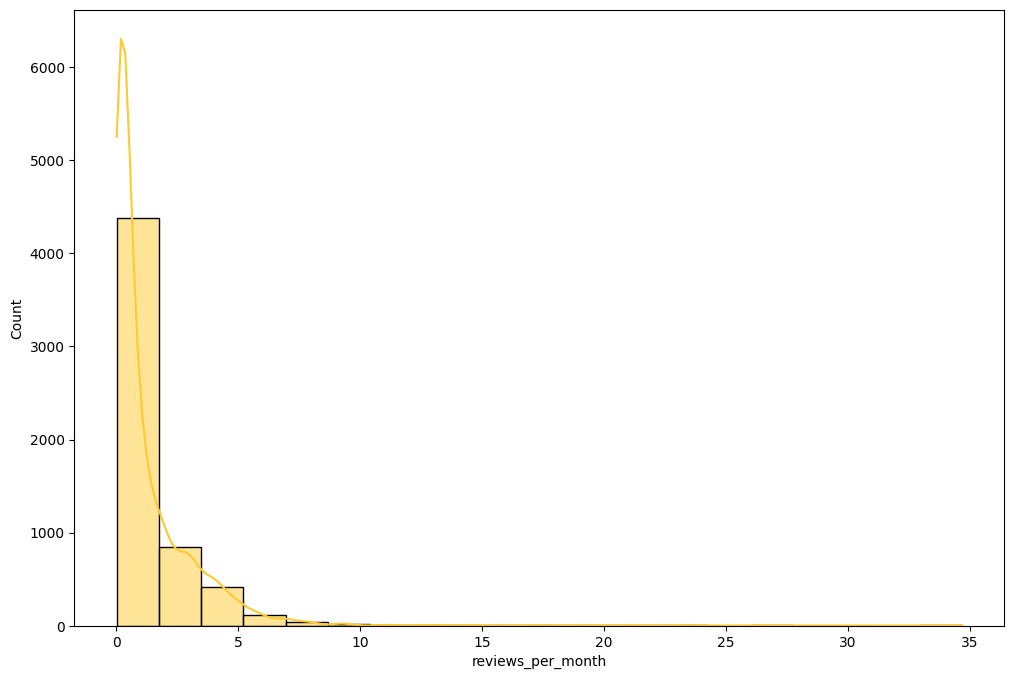

In [33]:
# DISTRIBUCIÓN DE LOS DATOS en la columna 'reviews_per_month'
plt.figure(figsize=(12, 8))                                                                    # Establecer tamaño del gráfico
sns.histplot(data=listings_copy, x='reviews_per_month', bins=20, kde=True, color='#feca30')    # Crear gráfico

In [34]:
listings_copy.columns

Index(['id', 'price', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bedrooms', 'bathrooms', 'accommodates', 'latitude', 'longitude',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'availability_365', 'reviews_per_month', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

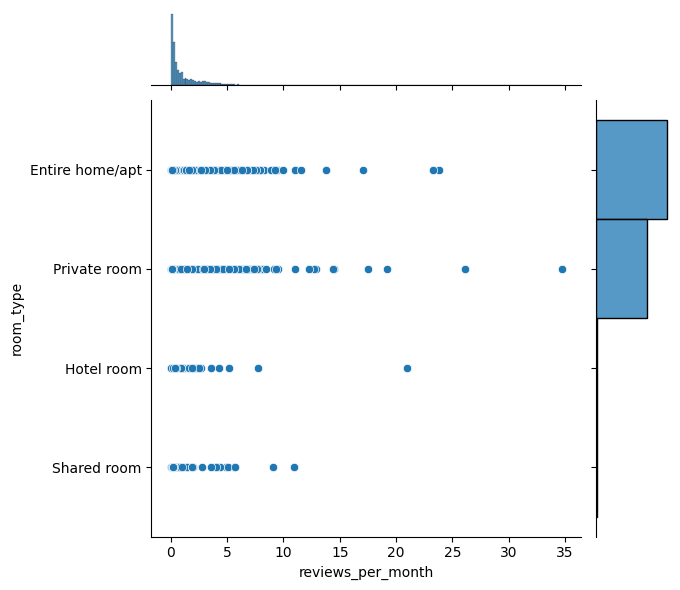

In [35]:
neighbourhood_reviews_count = listings_copy.groupby('neighbourhood_cleansed')['number_of_reviews'].count()
sns.jointplot(data=listings_copy, x='reviews_per_month', y='room_type', kind='scatter')

<Axes: xlabel='reviews_per_month'>

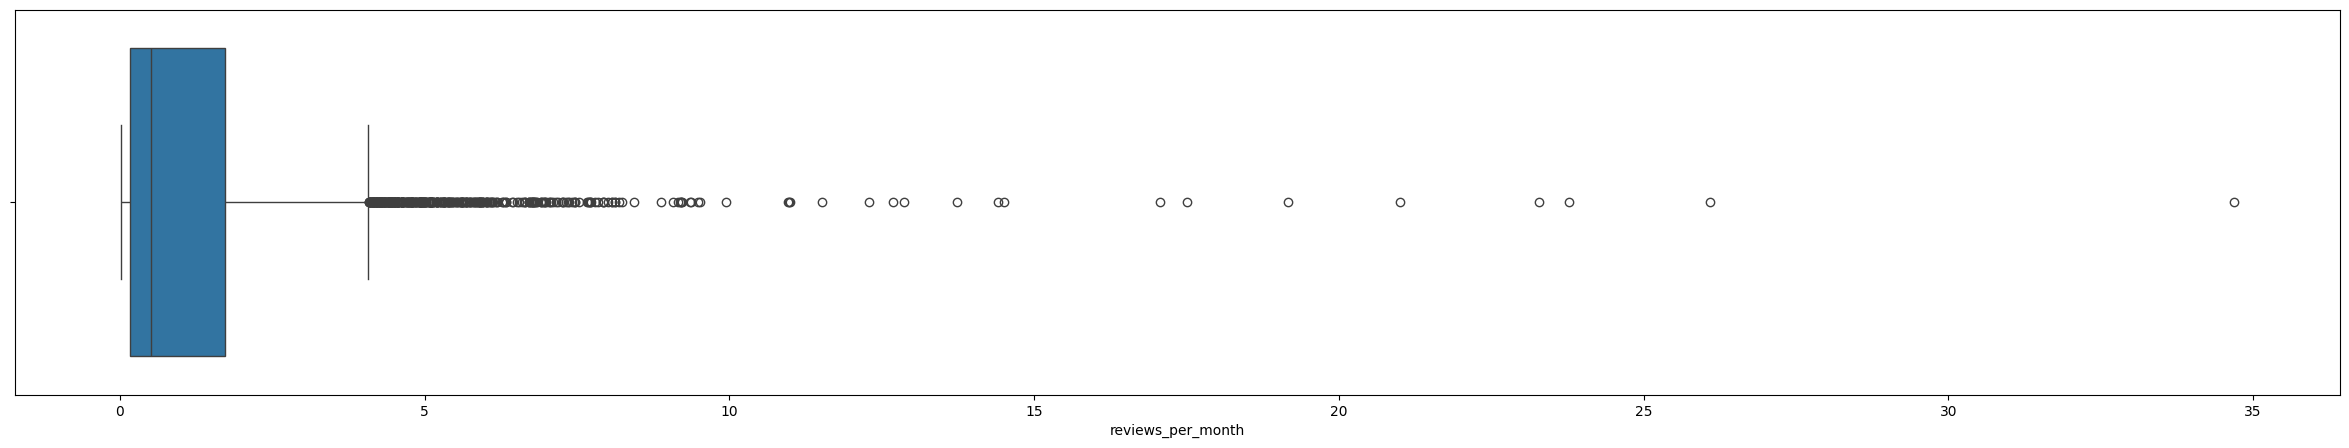

In [36]:
plt.figure(figsize=(30, 5))
sns.boxplot(data=listings_copy, x='reviews_per_month')

In [37]:
# Vemos en el gráfico la cantidad de outliers. Realizar cálculo para tener el % exacto.

# Calcular % de outliers en la columna ['reviews_per_month'] 
Q1 = listings_copy['reviews_per_month'].quantile(0.25)
Q3 = listings_copy['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = listings_copy[(listings_copy['reviews_per_month'] < lower_bound) | (listings_copy['reviews_per_month'] > upper_bound)]

percentage_outliers = round(len(outliers) / len(listings_copy) * 100,1)

print("El porcentaje de outliers en la columna 'reviews_per_month' es:", percentage_outliers, "%")

El porcentaje de outliers en la columna 'reviews_per_month' es: 5.2 %


In [38]:
# Sustituir valores NaN de la columna por la media. En este caso decido no quitar los outliers
mean_reviews = listings_copy['reviews_per_month'].mean()                 # Calcular la media de la columna 'reviews_per_month'
listings_copy['reviews_per_month'].fillna(mean_reviews, inplace=True)    # Sustituir los valores NaN por la media

In [39]:
listings_copy['reviews_per_month'].mean()

1.2596071367301425

<Axes: xlabel='reviews_per_month', ylabel='Count'>

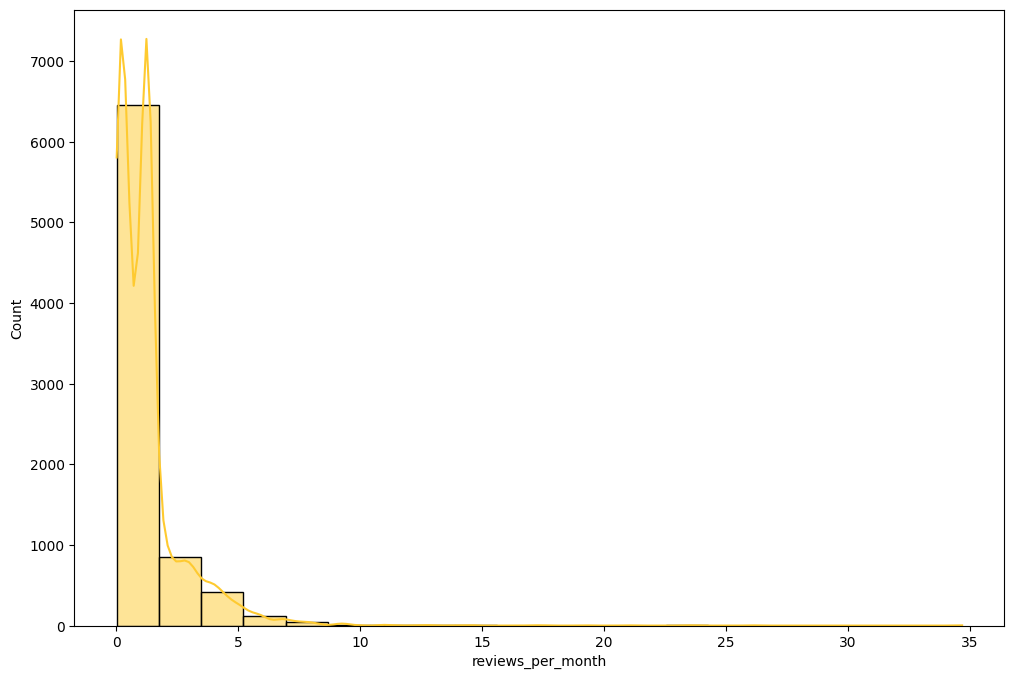

In [40]:
# DISTRIBUCIÓN DE LOS DATOS en la columna 'reviews_per_month' SIN NaN
plt.figure(figsize=(12, 8))                                                                    # Establecer tamaño del gráfico
sns.histplot(data=listings_copy, x='reviews_per_month', bins=20, kde=True, color='#feca30')    # Crear gráfico

In [41]:
# Comprobación limpieza columnas
total_nan2 = listings_copy.isnull().sum().sort_values(ascending=False)
print("Total valores nulos por columna:\n", total_nan2, "\n")

# Porcentaje de nulos en cada columna
perc_nan2 = (((listings_copy.isnull().sum()) / len(listings_copy)) * 100).sort_values(ascending=False)
print("% valores nulos por columna:\n", perc_nan2.to_string())

Total valores nulos por columna:
 id                        0
longitude                 0
minimum_nights            0
reviews_per_month         0
availability_365          0
review_scores_rating      0
number_of_reviews_ltm     0
number_of_reviews         0
latitude                  0
price                     0
accommodates              0
bathrooms                 0
bedrooms                  0
room_type                 0
property_type             0
neighbourhood_cleansed    0
maximum_nights            0
dtype: int64 

% valores nulos por columna:
 id                        0.0
longitude                 0.0
minimum_nights            0.0
reviews_per_month         0.0
availability_365          0.0
review_scores_rating      0.0
number_of_reviews_ltm     0.0
number_of_reviews         0.0
latitude                  0.0
price                     0.0
accommodates              0.0
bathrooms                 0.0
bedrooms                  0.0
room_type                 0.0
property_type            

In [42]:
listings_copy.shape

(7898, 17)

#### Columna 'property_type'

In [43]:
listings_copy['property_type'].value_counts()

# Hay varios valores que significan lo mismo. Unificar todos los que son 'Entire'

Entire rental unit                    1986
Room in hotel                         1093
Private room in home                   944
Entire condo                           841
Entire home                            797
Private room in rental unit            568
Entire guest suite                     492
Room in boutique hotel                 264
Private room in condo                  184
Entire serviced apartment              152
Entire guesthouse                       69
Room in aparthotel                      67
Entire loft                             57
Private room in guest suite             49
Entire townhouse                        45
Private room in townhouse               43
Shared room in hostel                   39
Private room in hostel                  33
Private room in bed and breakfast       22
Private room in resort                  20
Entire vacation home                    14
Entire cottage                          14
Private room in serviced apartment      14
Shared room

#### Añadir columnas de interés

In [44]:
# COLUMNA RANGO PRECIOS 'price_range'
print("Precio más bajo: ", listings_copy.price.min())
print("Precio más alto: ", listings_copy.price.max())

# NUEVA COLUMNA 'price_range' CON INTERVALOS DE 50 EN 50 (para usarla como filtro en Streamlit)
bins = [i for i in range(0, 501, 50)]  # Cambiar el límite superior a 501 para incluir 451

# Definir las etiquetas de los intervalos
labels = [f"{i}-{i+49}" for i in range(0, 500, 50)]

# Crear la columna 'price_range' usando pd.cut
listings_copy['price_range'] = pd.cut(listings_copy['price'], bins=bins, labels=labels)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(listings_copy[['price', 'price_range']].head())

Precio más bajo:  10.0
Precio más alto:  451.0
        price price_range
0  150.000000     100-149
1  160.046585     150-199
2  160.046585     150-199
3   69.000000       50-99
4  246.000000     200-249


In [45]:
listings_copy.head(20)

id       price neighbourhood_cleansed  \
0              1094764  150.000000         Inner Richmond   
1             38047206  160.046585                Bayview   
2             43475468  160.046585                Mission   
3   648549709021440854   69.000000              Excelsior   
4             47918229  246.000000                 Marina   
5   938317240177880784  328.000000       Presidio Heights   
6             24823466  135.000000    Castro/Upper Market   
7             53849558  175.000000        South of Market   
8             20077154   60.000000          Outer Mission   
9             30774802   40.000000              Excelsior   
10              415498   80.000000        Pacific Heights   
11            24491303  120.000000        South of Market   
12  725479609346985276   61.000000              Excelsior   
13             3442439  125.000000         Bernal Heights   
14            53747035  209.000000        South of Market   
15             2802480  285.000000                 Marina   
16            48955947  125.000000        Pacific Heights   
17            25376401  208.000000    Castro/Upper Market   
18            53835580  155.000000     Financial District   
19            40490045   50.000000          Outer Mission   

                  property_type        room_type  bedrooms  bathrooms  \
0            Entire rental unit  Entire home/apt       1.0        1.0   
1          Private room in home     Private room       1.0        1.0   
2                   Entire home  Entire home/apt       2.0        1.0   
3          Private room in home     Private room       1.0        2.5   
4            Entire rental unit  Entire home/apt       2.0        1.0   
5                  Entire condo  Entire home/apt       2.0        2.0   
6   Private room in rental unit     Private room       1.0        1.0   
7                  Entire condo  Entire home/apt       1.0        1.0   
8          Private room in home     Private room       1.0        1.0   
9   Private room in guest suite     Private room       3.0        2.0   
10           Entire rental unit  Entire home/apt       1.0        1.0   
11  Private room in rental unit     Private room       2.0        2.0   
12         Private room in home     Private room       1.0        1.0   
13           Entire guest suite  Entire home/apt       1.0        1.0   
14           Entire rental unit  Entire home/apt       1.0        1.0   
15           Entire rental unit  Entire home/apt       2.0        1.0   
16           Entire rental unit  Entire home/apt       1.0        1.0   
17           Entire guest suite  Entire home/apt       1.0        1.0   
18           Entire rental unit  Entire home/apt       0.0        1.0   
19         Private room in home     Private room       1.0        1.0   

    accommodates   latitude   longitude  number_of_reviews  \
0              2  37.788140 -122.465470                  1   
1              1  37.729800 -122.400960                  0   
2              5  37.757210 -122.412450                  0   
3              2  37.726761 -122.408522                  6   
4              4  37.803660 -122.445180                  0   
5              4  37.789860 -122.450940                 12   
6              2  37.766000 -122.434980                  7   
7              2  37.784250 -122.392540                  7   
8              1  37.724900 -122.439790                  7   
9              1  37.726820 -122.421590                 48   
10             2  37.793950 -122.426090                 31   
11             1  37.778398 -122.403076                  0   
12             4  37.722150 -122.434420                 16   
13             2  37.736060 -122.423670                255   
14             2  37.787703 -122.391971                  0   
15             4  37.801010 -122.445270                 41   
16             2  37.794010 -122.426640                 10   
17             2  37.758360 -122.430040                135   
18             2  37.79508

#### Cambiar tipo de dato en columnas

In [46]:
# ARREGLAR TIPO DE DATO EN COLUMNAS
listings_copy.loc[:, 'bedrooms'] = listings_copy['bedrooms'].astype(int).copy()     # bedrooms -> int
listings_copy.loc[:, 'bathrooms'] = listings_copy['bathrooms'].astype(int).copy()   # bathrooms-> int
listings_copy.loc[:, 'price'] = listings_copy['price'].astype(float).copy()         # price    -> float

# MOSTRAR MISMO NÚMERO DE DECIMALES EN 'price', 'review_scores_rating', ' reviews_per_month'
listings_copy['price'] = listings_copy['price'].round(2)
listings_copy['review_scores_rating'] = listings_copy['review_scores_rating'].round(2)
listings_copy['reviews_per_month'] = listings_copy['reviews_per_month'].round(2)

C:\Users\Marta\AppData\Local\Temp\ipykernel_9300\1887447575.py:2: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\Marta\AppData\Local\Temp\ipykernel_9300\1887447575.py:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [47]:
listings_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7898 entries, 0 to 8360
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      7898 non-null   int64   
 1   price                   7898 non-null   float64 
 2   neighbourhood_cleansed  7898 non-null   object  
 3   property_type           7898 non-null   object  
 4   room_type               7898 non-null   object  
 5   bedrooms                7898 non-null   int32   
 6   bathrooms               7898 non-null   int32   
 7   accommodates            7898 non-null   int64   
 8   latitude                7898 non-null   float64 
 9   longitude               7898 non-null   float64 
 10  number_of_reviews       7898 non-null   int64   
 11  number_of_reviews_ltm   7898 non-null   int64   
 12  review_scores_rating    7898 non-null   float64 
 13  availability_365        7898 non-null   int64   
 14  reviews_per_month       

<Axes: xlabel='bathrooms', ylabel='Count'>

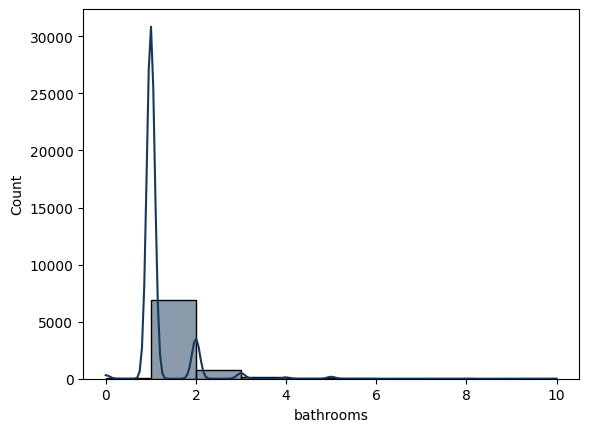

In [48]:
sns.histplot(data=listings_copy, x='bathrooms', bins=10, kde=True, color='#16385b')

In [49]:
listings_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7898 entries, 0 to 8360
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      7898 non-null   int64   
 1   price                   7898 non-null   float64 
 2   neighbourhood_cleansed  7898 non-null   object  
 3   property_type           7898 non-null   object  
 4   room_type               7898 non-null   object  
 5   bedrooms                7898 non-null   int32   
 6   bathrooms               7898 non-null   int32   
 7   accommodates            7898 non-null   int64   
 8   latitude                7898 non-null   float64 
 9   longitude               7898 non-null   float64 
 10  number_of_reviews       7898 non-null   int64   
 11  number_of_reviews_ltm   7898 non-null   int64   
 12  review_scores_rating    7898 non-null   float64 
 13  availability_365        7898 non-null   int64   
 14  reviews_per_month       

In [50]:
# Comprobar estado de los datos
listings_copy.describe().T

count          mean           std        min  \
id                     7898.0  3.702145e+17  4.502716e+17  958.00000   
price                  7898.0  1.600473e+02  7.699979e+01   10.00000   
bedrooms               7898.0  1.317296e+00  8.712812e-01    0.00000   
bathrooms              7898.0  1.151811e+00  5.338935e-01    0.00000   
accommodates           7898.0  2.966954e+00  1.720585e+00    1.00000   
latitude               7898.0  3.776991e+01  2.296328e-02   37.70848   
longitude              7898.0 -1.224294e+02  2.687459e-02 -122.51246   
number_of_reviews      7898.0  4.656647e+01  1.012528e+02    0.00000   
number_of_reviews_ltm  7898.0  8.778425e+00  1.891708e+01    0.00000   
review_scores_rating   7898.0  4.747023e+00  4.232315e-01    1.00000   
availability_365       7898.0  1.758429e+02  1.343134e+02    0.00000   
reviews_per_month      7898.0  1.259710e+00  1.554004e+00    0.01000   
minimum_nights         7898.0  2.014890e+01  4.761686e+01    1.00000   
maximum_nights         7898.0  6.474424e+02  1.591246e+04    1.00000   

                                25%           50%           75%           max  
id                     2.327157e+07  4.901366e+07  8.572786e+17  1.105980e+18  
price                  1.100000e+02  1.560000e+02  1.760000e+02  4.510000e+02  
bedrooms               1.000000e+00  1.000000e+00  2.000000e+00  1.000000e+01  
bathrooms              1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+01  
accommodates           2.000000e+00  2.000000e+00  4.000000e+00  1.600000e+01  
latitude               3.775509e+01  3.777596e+01  3.778841e+01  3.780981e+01  
longitude             -1.224403e+02 -1.224216e+02 -1.224110e+02 -1.223585e+02  
number_of_reviews      0.000000e+00  6.000000e+00  4.100000e+01  1.166000e+03  
number_of_reviews_ltm  0.000000e+00  1.000000e+00  7.000000e+00  3.870000e+02  
review_scores_rating   4.750000e+00  4.800000e+00  4.970000e+00  5.000000e+00  
availability_365       3.925000e+01  1.750000e+02  3.000000e+02  3.650000e+02  
reviews_per_month      2.600000e-01  1.190000e+00  1.260000e+00  3.469000e+01  
minimum_nights         2.000000e+00  3.000000e+00  3.000000e+01  1.125000e+03  
maximum_nights         3.000000e+01  3.600000e+02  3.650000e+02  9.999990e+05

In [51]:
listings_copy.head(20)

id   price neighbourhood_cleansed  \
0              1094764  150.00         Inner Richmond   
1             38047206  160.05                Bayview   
2             43475468  160.05                Mission   
3   648549709021440854   69.00              Excelsior   
4             47918229  246.00                 Marina   
5   938317240177880784  328.00       Presidio Heights   
6             24823466  135.00    Castro/Upper Market   
7             53849558  175.00        South of Market   
8             20077154   60.00          Outer Mission   
9             30774802   40.00              Excelsior   
10              415498   80.00        Pacific Heights   
11            24491303  120.00        South of Market   
12  725479609346985276   61.00              Excelsior   
13             3442439  125.00         Bernal Heights   
14            53747035  209.00        South of Market   
15             2802480  285.00                 Marina   
16            48955947  125.00        Pacific Heights   
17            25376401  208.00    Castro/Upper Market   
18            53835580  155.00     Financial District   
19            40490045   50.00          Outer Mission   

                  property_type        room_type  bedrooms  bathrooms  \
0            Entire rental unit  Entire home/apt         1          1   
1          Private room in home     Private room         1          1   
2                   Entire home  Entire home/apt         2          1   
3          Private room in home     Private room         1          2   
4            Entire rental unit  Entire home/apt         2          1   
5                  Entire condo  Entire home/apt         2          2   
6   Private room in rental unit     Private room         1          1   
7                  Entire condo  Entire home/apt         1          1   
8          Private room in home     Private room         1          1   
9   Private room in guest suite     Private room         3          2   
10           Entire rental unit  Entire home/apt         1          1   
11  Private room in rental unit     Private room         2          2   
12         Private room in home     Private room         1          1   
13           Entire guest suite  Entire home/apt         1          1   
14           Entire rental unit  Entire home/apt         1          1   
15           Entire rental unit  Entire home/apt         2          1   
16           Entire rental unit  Entire home/apt         1          1   
17           Entire guest suite  Entire home/apt         1          1   
18           Entire rental unit  Entire home/apt         0          1   
19         Private room in home     Private room         1          1   

    accommodates   latitude   longitude  number_of_reviews  \
0              2  37.788140 -122.465470                  1   
1              1  37.729800 -122.400960                  0   
2              5  37.757210 -122.412450                  0   
3              2  37.726761 -122.408522                  6   
4              4  37.803660 -122.445180                  0   
5              4  37.789860 -122.450940                 12   
6              2  37.766000 -122.434980                  7   
7              2  37.784250 -122.392540                  7   
8              1  37.724900 -122.439790                  7   
9              1  37.726820 -122.421590                 48   
10             2  37.793950 -122.426090                 31   
11             1  37.778398 -122.403076                  0   
12             4  37.722150 -122.434420                 16   
13             2  37.736060 -122.423670                255   
14             2  37.787703 -122.391971                  0   
15             4  37.801010 -122.445270                 41   
16             2  37.794010 -122.426640                 10   
17             2  37.758360 -122.430040                135   
18             2  37.795086 -122.401029                  6   
19             2  37.726400 -122.434980         

#### Guardar listings_copy como .csv

In [52]:
listings_copy.to_csv('listings_preprocessed.csv', index=False)

In [53]:
listings_copy.columns

Index(['id', 'price', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bedrooms', 'bathrooms', 'accommodates', 'latitude', 'longitude',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'availability_365', 'reviews_per_month', 'minimum_nights',
       'maximum_nights', 'price_range'],
      dtype='object')

## Lectura y contenido 'reviews'

In [54]:
# Lectura
reviews = pd.read_csv('data/2-reviews.csv')

In [55]:
# Visualizar primeras filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 220)  # Ancho de celdas al mostrar
reviews.head()

listing_id     id        date  reviewer_id reviewer_name  \
0         958   5977  2009-07-23        15695      Edmund C   
1         958   6660  2009-08-03        26145         Simon   
2         958  11519  2009-09-27        25839         Denis   
3         958  16282  2009-11-05        33750          Anna   
4         958  26008  2010-02-13        15416     V Jillian   

                                                                                                                                                                                                                      comments  
0  Our experience was, without a doubt, a five star experience. Holly and her husband, David, were the consummate hosts; friendly and accomodating while still honoring our privacy. The apartment was a charming layout wi...  
1  Returning to San Francisco is a rejuvenating thrill but this time it was enhanced by our stay at Holly and David's beautifully renovated and perfectly located apartment. You do not need a car to enjoy the City as eve...  
2  We were very pleased with the accommodations and the friendly neighborhood. Being able to make a second bed out of the futon couch was particularly helpful. Having a full kitchen, a lovely walkout garden, and TV + DV...  
3  We highly recommend this accomodation and agree with the previous postings: Holly and David were extremely helpful and friendly (but not at all instrusive), the unit itself is just superb and in a wondeful location. ...  
4  Holly's place was great. It was exactly what I needed.  Perfect location, super clean, and even a little patio out back. Since I go back to San Francisco frequently, there's a good chance I will make this a place I c...

In [56]:
reviews.shape

(380425, 6)

In [57]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380425 entries, 0 to 380424
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     380425 non-null  int64 
 1   id             380425 non-null  int64 
 2   date           380425 non-null  object
 3   reviewer_id    380425 non-null  int64 
 4   reviewer_name  380425 non-null  object
 5   comments       380363 non-null  object
dtypes: int64(3), object(3)
memory usage: 17.4+ MB


#### Limpieza de columnas en 'reviews'

In [58]:
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         62
dtype: int64

In [59]:
# Eliminar filas sin comentario del df y comprobar
reviews.dropna(subset=['comments'], inplace=True)
reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [60]:
reviews.to_csv('reviews_preprocessed.csv', index=False)

## ANÁLISIS

Airbnb quiere tomar decisiones para mejorar el rendimiento del servicio en la ciudad de San Francisco, por lo que necesita un informe       
detallado que incluya información relevante sobre las características y precios de las propiedades con las que cuenta en la ciudad.

1. Resumen general de la oferta de alquileres vacacionales en la ciudad:
- Distribución de las propiedades por barrio (neighbourhood_cleansed).
- Distribución de los tipos de propiedad (property_type) y tipos de habitación (room_type).

2. Precios y disponibilidad:
- Precio medio y rango de precios por barrio.
- Precio medio y rango de precios por tipo de propiedad y tipo de habitación.
- Disponibilidad promedio (availability_365) por barrio, tipo de propiedad y tipo de habitación.

3. Características de las propiedades:
- Moda de habitaciones (bedrooms) y baños (bathrooms) por barrio.
- Capacidad media de alojamiento (accommodates) por barrio.

4. Análisis adicional:
- Correlaciones entre las diferentes características (por ejemplo, ¿cómo se relaciona el precio con la calificación de la revisión o la disponibilidad?).
- Tendencias temporales en la disponibilidad y precios de los listados.

### 1-Resumen general de la oferta de alquileres vacacionales en la ciudad:

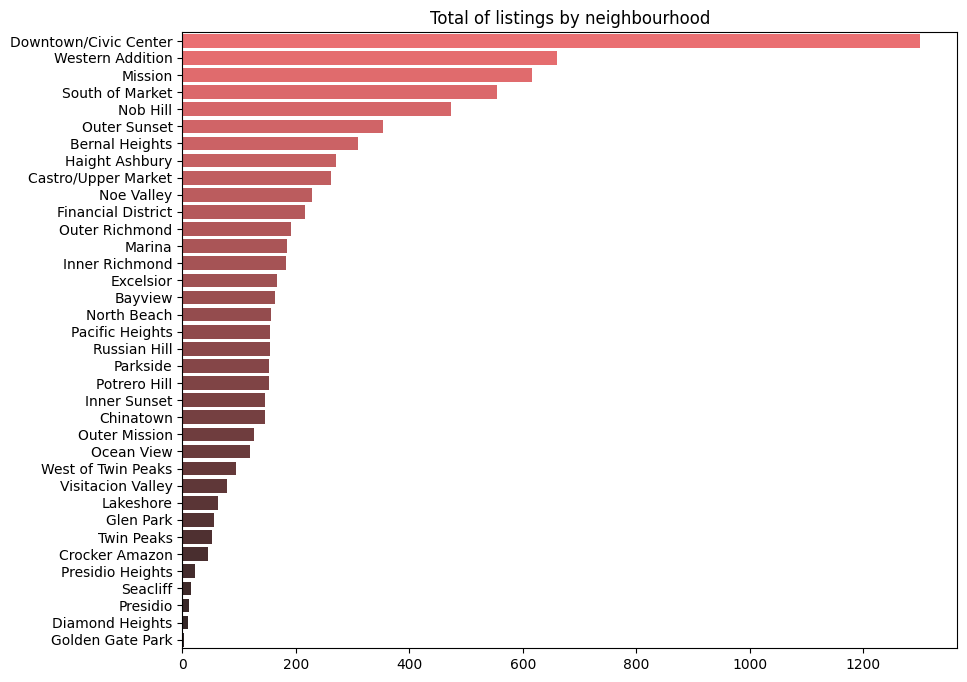

In [124]:
# TOTAL DE PROPIEDADES POR BARRIO
# Recuento de propiedades por barrio (ordenado de mayor a menor)
neighbourhood_counts = listings_copy['neighbourhood_cleansed'].value_counts().sort_values(ascending=False)

# Crear el gráfico de barras horizontales con Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=neighbourhood_counts.values, y=neighbourhood_counts.index, palette='dark:#ff5a5e_r', hue=neighbourhood_counts.index, legend=False)

# Establecer título y etiquetas de los ejes
plt.title('Total of listings by neighbourhood')
plt.xlabel('')
plt.ylabel('')

plt.show()

In [123]:
geo_data = gpd.read_file('DATA/5-neighbourhoods.geojson')                                     # Cargar el archivo GeoJSON    
neighbourhood_counts_df = pd.DataFrame(neighbourhood_counts).reset_index()                    # Convertir 'neighbourhood_counts' a dataframe  para poder unir
neighbourhood_counts_df.columns = ['neighbourhood', 'count']                                  # Renombrar columnas para que coincidan con las de 'geo_data'
merged_data = geo_data.merge(neighbourhood_counts_df, how='left', on='neighbourhood')         # Unir 'geo_data' y 'neighbourhood_counts_df'

# Crear el mapa utilizando Plotly Express
fig = px.choropleth_mapbox(merged_data, 
                           geojson=merged_data.geometry, 
                           locations=merged_data.index, 
                           color='count', 
                           color_continuous_scale='reds',
                           range_color=(0, merged_data['count'].max()),
                           mapbox_style="carto-positron",
                           zoom=10, 
                           center={'lat': 37.7749, 'lon': -122.4194},
                           opacity=1,
                           labels={'count': 'Total of listings'},
                           hover_name='neighbourhood',                                         # Nombre que se mostrará al pasar el mouse
                           hover_data={'count': True}                                          # Datos adicionales que se mostrarán al pasar el mouse
                          )

# Actualizar el diseño del mapa
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Personalizar los datos de hover para excluir el índice
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>Total of listings by neighbourhood: %{customdata[0]}')


# Mostrar el mapa
fig.show()


In [62]:
# TIPOS DE HABITACIÓN MÁS POPULARES
rooms_type = listings_copy['room_type'].value_counts().reset_index()                  # Con 'reset_index()' convierto el resultado en un DataFrame y se restablece el índice.
rooms_type.columns = ['room_type', 'total_propiedades']                               # Renombrar las columnas
rooms_type = rooms_type.sort_values(by='total_propiedades', ascending=False)          # Ordenar de mayor a menor
print(rooms_type)

         room_type  total_propiedades
0  Entire home/apt               4504
1     Private room               3263
2      Shared room                 69
3       Hotel room                 62


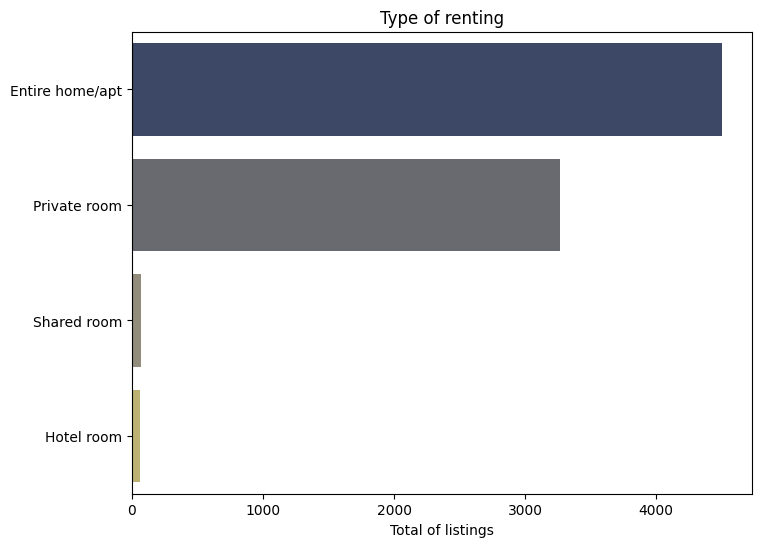

In [201]:
# TIPOS DE HABITACIÓN MÁS POPULARES
plt.figure(figsize=(8, 6))
sns.barplot(data=rooms_type, x='total_propiedades' , y='room_type', palette='cividis', hue='room_type', legend=False)

# Establecer etiquetas y título
plt.xlabel('Total of listings')
plt.ylabel('')
plt.title('Type of renting')
plt.show()

In [64]:
# CAPACIDAD (PX) SEGÚN TIPO DE ALQUILER
entire_rental = listings_copy[listings_copy['room_type'] == 'Entire home/apt']   # Centrarnos en los que más tenemos ('Entire home/apt')
accommodates_entire_rental = entire_rental['accommodates'].value_counts().sort_index()
print(accommodates_entire_rental)

1       75
2     1742
3      448
4     1275
5      294
6      417
7       67
8      118
9       21
10      27
11       5
12      14
15       1
Name: accommodates, dtype: int64


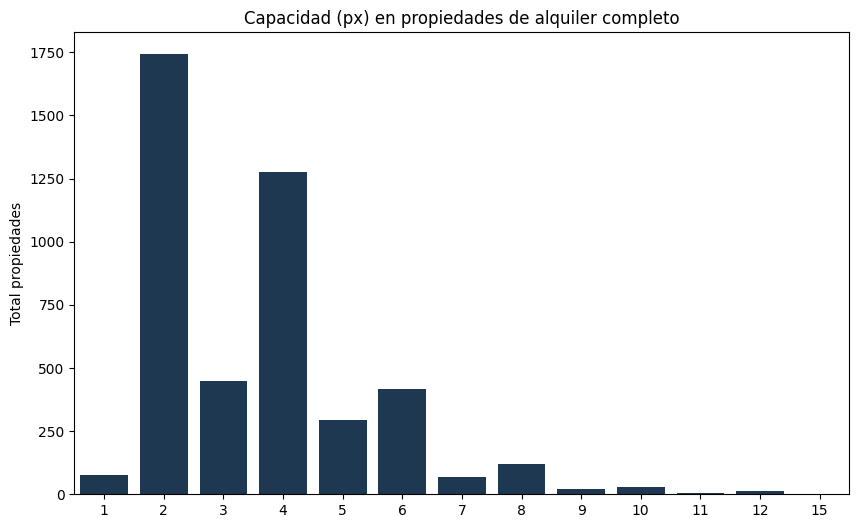

In [65]:
# CAPACIDAD (PX) EN ALQUILERES COMPLETOS ('Entire home/apt')
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=accommodates_entire_rental.index, y=accommodates_entire_rental.values, color='#16385b')

# Añadir título y etiquetas de los ejes
plt.title('Capacidad (px) en propiedades de alquiler completo')
plt.xlabel('')
plt.ylabel('Total propiedades')

# Mostrar el gráfico
plt.show()

In [66]:
# TIPOS DE PROPIEDADES MÁS POPULARES
propiedades_por_tipo = listings_copy['property_type'].value_counts().reset_index()                  # Con 'reset_index()' convierto el resultado en un DataFrame y se restablece el índice.
propiedades_por_tipo.columns = ['property_type', 'total_propiedades']                               # Renombrar las columnas
propiedades_por_tipo = propiedades_por_tipo.sort_values(by='total_propiedades', ascending=False)    # Ordenar de mayor a menor
print(propiedades_por_tipo)

                         property_type  total_propiedades
0                   Entire rental unit               1986
1                        Room in hotel               1093
2                 Private room in home                944
3                         Entire condo                841
4                          Entire home                797
5          Private room in rental unit                568
6                   Entire guest suite                492
7               Room in boutique hotel                264
8                Private room in condo                184
9            Entire serviced apartment                152
10                   Entire guesthouse                 69
11                  Room in aparthotel                 67
12                         Entire loft                 57
13         Private room in guest suite                 49
14                    Entire townhouse                 45
15           Private room in townhouse                 43
16            

In [140]:
# TOP 10 DE TIPOS DE PROPIEDADES (segúnc cantidad)
top_10_propiedades = propiedades_por_tipo.head(10)

# Crear el gráfico de dispersión con Plotly Express
fig = px.scatter(top_10_propiedades, x='total_propiedades', y='property_type', 
                 color_discrete_sequence=['#16385b'],  # Color azul oscuro
                 labels={'total_propiedades': 'Count', 'property_type': ''},
                 title='Types of property (TOP 10)')

# Invertir el eje y para que los tipos de propiedad aparezcan en orden descendente
fig.update_yaxes(autorange="reversed")

# Ajustar el tamaño de la figura
fig.update_layout(width=800, height=500, title_x=0.5)

# Quitar la leyenda
fig.update_layout(showlegend=False)

# Mostrar el gráfico
fig.show()


### 2-Precios y disponibilidad
- Precio medio por barrio.
- Precio medio por tipo de habitación.
- Disponibilidad promedio (availability_365) por barrio, tipo de propiedad y tipo de habitación.

In [69]:
listings_copy.columns

Index(['id', 'price', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bedrooms', 'bathrooms', 'accommodates', 'latitude', 'longitude',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'availability_365', 'reviews_per_month', 'minimum_nights',
       'maximum_nights', 'price_range'],
      dtype='object')

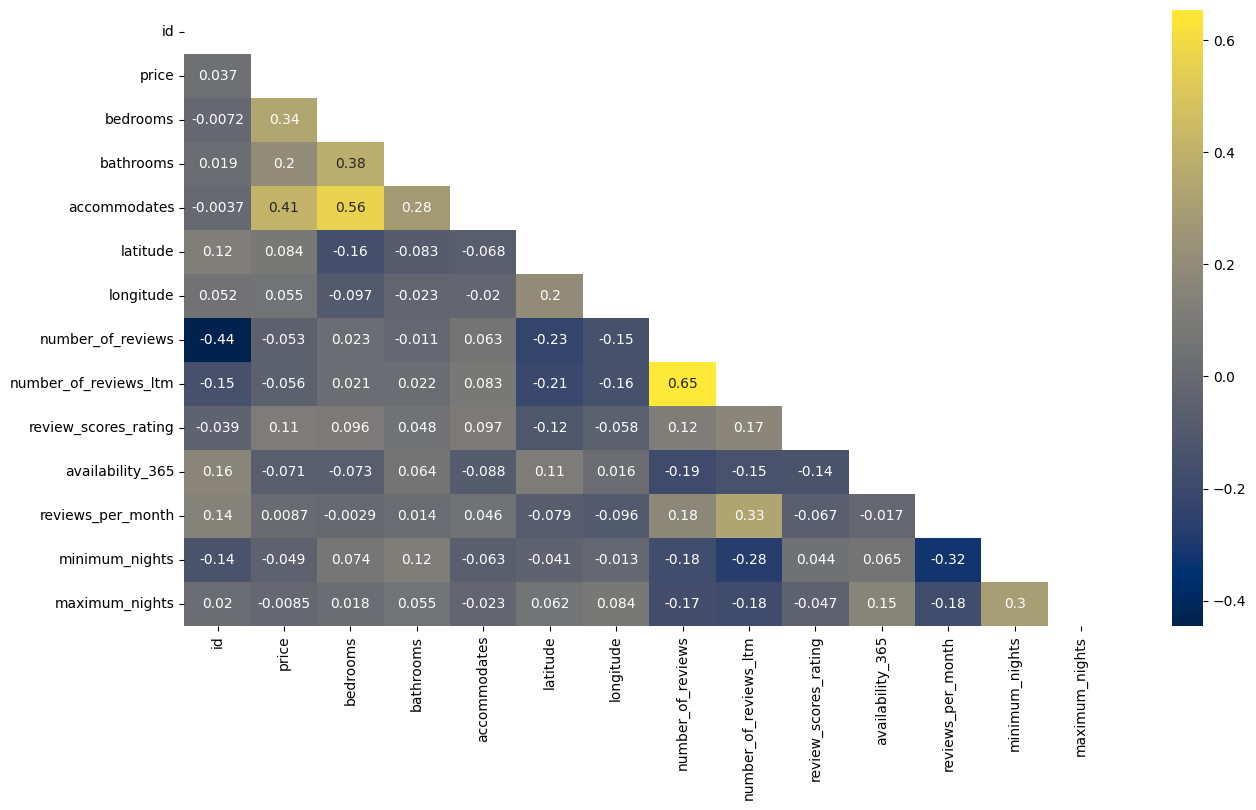

In [200]:
# CORRELACIÓN VARIABLES EN 'listings_copy' - Las que tienen mayor correlación con 'price' son 'bedrooms' y 'accommodates'
corr = listings_copy.corr(method='kendall', numeric_only=True)    # Calcular la matriz de correlación
mask = np.triu(corr)                                              # Triangular la matriz de correlación y transponerla

plt.figure(figsize=(15, 8))                                       # Configurar el tamaño de la figura             
sns.heatmap(corr, annot=True, mask=mask, cmap='cividis')          # Crear el mapa de calor con la matriz triangular
plt.show()

In [160]:
# PRECIO MEDIO EN LA CIUDAD
average_price = round(listings_copy['price'].mean(),2)
print("Average price of listings in the city is", average_price, '$')

Average price of listings in the city is 160.05 $


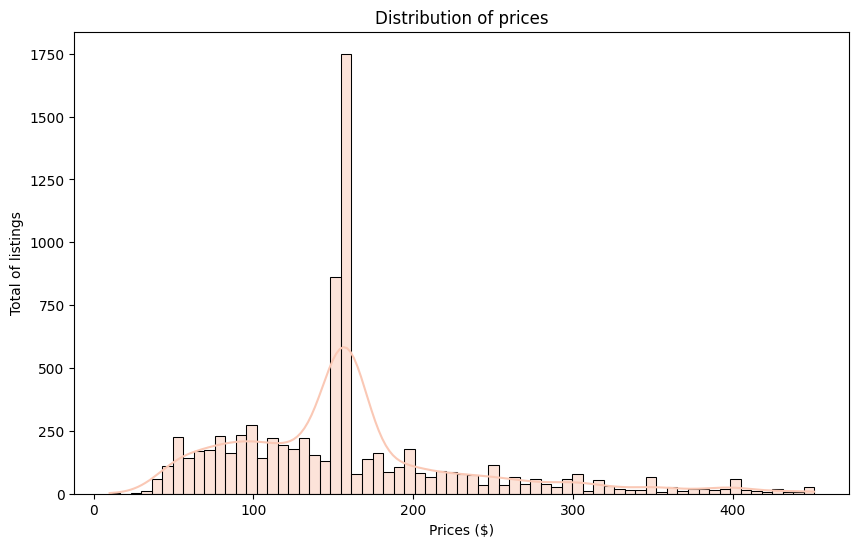

In [199]:
# DISTRIBUCIÓN PRECIOS
plt.figure(figsize=(10, 6))
sns.histplot(data=listings_copy['price'], kde=True, color='#fac8b5')

plt.title('Distribution of prices')
plt.xlabel('Prices ($)')
plt.ylabel('Total of listings')
plt.show()

In [71]:
# PRECIO MEDIO POR BARRIO
mean_price_neighbourhoods = round(listings_copy.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False),2)
print(mean_price_neighbourhoods)

neighbourhood_cleansed
Presidio                 215.36
Twin Peaks               213.12
Diamond Heights          204.91
Presidio Heights         197.18
Castro/Upper Market      194.38
Glen Park                186.35
Russian Hill             184.66
Financial District       184.51
Potrero Hill             181.73
Noe Valley               180.70
Haight Ashbury           178.70
Marina                   176.81
North Beach              176.70
Chinatown                171.45
South of Market          171.06
Bernal Heights           169.11
Inner Richmond           167.96
Pacific Heights          167.46
Western Addition         160.93
Downtown/Civic Center    156.57
Outer Richmond           154.22
Mission                  154.17
West of Twin Peaks       153.50
Nob Hill                 152.12
Inner Sunset             146.49
Parkside                 139.85
Outer Mission            138.29
Golden Gate Park         136.67
Outer Sunset             135.11
Ocean View               132.03
Visitacion Valley

In [76]:
geo_data.columns

Index(['neighbourhood', 'neighbourhood_group', 'geometry', 'price'], dtype='object')

In [192]:
# Cargar el archivo GeoJSON
geo_data = gpd.read_file('DATA/5-neighbourhoods.geojson')

# Unir el DataFrame de precios con los límites de los barrios
geo_data = geo_data.merge(mean_price_neighbourhoods, how='left', left_on='neighbourhood', right_on='neighbourhood_cleansed')

# Crear el mapa utilizando Plotly Express
fig = px.choropleth_mapbox(geo_data, 
                           geojson=geo_data.geometry, 
                           locations=geo_data.index, 
                           color='price', 
                           color_continuous_scale="portland",
                           range_color=(0, geo_data['price'].max()),
                           mapbox_style="carto-positron",
                           zoom=10, 
                           center={'lat': 37.7749, 'lon': -122.4194},
                           opacity=1,
                           labels={'price': 'Average nightly price'},
                           hover_name='neighbourhood',  # Nombre que se mostrará al pasar el mouse
                           hover_data={'price': True, 'neighbourhood': True}  # Datos adicionales que se mostrarán al pasar el mouse
                          )

# Actualizar el diseño del mapa
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Personalizar los datos de hover para excluir el índice
fig.update_traces(hovertemplate='<b>%{customdata[1]}</b><br>Average nightly price: %{customdata[0]}')

# Mostrar el mapa
fig.show()

In [78]:
# PRECIO MEDIO POR TIPO DE HABITACIÓN
mean_price_type_room = round(listings_copy.groupby('room_type')['price'].mean().sort_values(ascending=False),2)
print(mean_price_type_room)

room_type
Entire home/apt    185.28
Hotel room         149.27
Private room       126.22
Shared room        122.70
Name: price, dtype: float64


In [216]:
# Ordenar por mediana descendente para visualizar mejor las distribuciones
median_prices_order = listings_copy.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False)

# Crear el gráfico interactivo con Plotly Express
fig = px.box(listings_copy, 
             y='neighbourhood_cleansed', 
             x='price', 
             category_orders={'neighbourhood_cleansed': median_prices_order.index},
             color_discrete_sequence=['#737373'])


# Actualizar las etiquetas del gráfico
fig.update_layout(xaxis_title='Prices($)', 
                  yaxis_title='', 
                  title='Price Distribution by Neighbourhood',
                  width=1000,
                  height=800,
                  title_x=0.5)

# Mostrar el gráfico interactivo
fig.show()

# Preguntas a los datos:
- Relación entre el precio y la ubicación geográfica (latitud/longitud).
- Comparación de precios según el tipo de propiedad (apartamento, casa, habitación compartida, etc.).
- Análisis de la disponibilidad a lo largo del año y su relación con la calificación de las reseñas.
- Investigación sobre la relación entre el número de baños y el número de dormitorios.
- Estudio sobre la influencia del número mínimo de noches en la calificación de las reseñas.
- Análisis de la distribución de propiedades según el tipo de propiedad y la disponibilidad durante el año.
- Relación entre la calificación de las reseñas y la distancia a ciertos puntos de interés (atracciones turísticas, transporte público, etc.).
- Comparación de precios entre diferentes barrios o áreas geográficas.
- Investigación sobre la relación entre el número de reseñas por mes y la disponibilidad.
- Análisis de la distribución de propiedades según la cantidad máxima de noches permitidas.
- Estudio sobre la relación entre la calificación de las reseñas y la antigüedad del anuncio.
- Investigación sobre la influencia del tipo de propiedad en la cantidad mínima de noches requeridas.
- Comparación de precios entre propiedades con y sin servicios adicionales (piscina, gimnasio, estacionamiento, etc.).
- Análisis de la relación entre el precio y la proximidad a áreas comerciales o de entretenimiento.
- Estudio sobre la relación entre el precio y la cantidad de comentarios recibidos por mes.
- Investigación sobre la relación entre la calificación de las reseñas y la cantidad de reseñas recibidas por mes.
- Comparación de la distribución de propiedades según el tipo de propiedad y el número de baños.
- Análisis de la distribución de propiedades según el tipo de propiedad y el número de dormitorios.
- Investigación sobre la relación entre la calificación de las reseñas y la disponibilidad durante los fines de semana.
- Estudio sobre la influencia del número de reseñas por mes en la calificación de las reseñas.